# Twitch Dataset
Data CSV obtained from: https://www.kaggle.com/aayushmishra1512/twitchdata.

Data source from: https://sullygnome.com/.

Columns:
- Watch time(Minutes): Total minutes watched from viewers for the channel.
- Stream time(minutes): Total minutes streamed by the channel.
- Peak viewers: Peak viewers the channel had.
- Average viewers: Average viewers per stream by the channel.
- Followers: Total followers the channel has at the date of obtained data.
- Followers gained: Followers gained by channel within 365 from date of obtained data.
- Views gained: Total viewers for the channel within 365 days from date of obtained data.
- Partnered: If channel is partnered.
- Mature: If channel is labeled for mature audiences.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import os

In [93]:
# Lists files in directory
files = [file for file in os.listdir('./data/twitch_data')]
for file in files:
    print(file)

twitchdata-update.csv


In [4]:
# If multiple 
#all_twitch_data = pd.DataFrame()
#for file in files:
#    df = pd.read_csv("./data/twitch_data/" + file)
#    all_twitch_data = pd.concat([all_twitch_data, df])
    
#all_twitch_data.to_csv("./data/all_twitch_data", index=False)

In [5]:
df = pd.read_csv('./data/twitch_data/twitchdata-update.csv')

In [6]:
# Preview data
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [7]:
# Check for any nul values
df.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [8]:
# Column types
df.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

In [9]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),1000.0,4.184279e+08,5.496355e+08,122192850.0,1.631899e+08,234990787.5,4.337399e+08,6.196162e+09
Stream time(minutes),1000.0,1.205152e+05,8.537620e+04,3465.0,7.375875e+04,108240.0,1.418438e+05,5.214450e+05
Peak viewers,1000.0,3.706505e+04,6.031431e+04,496.0,9.113750e+03,16676.0,3.756975e+04,6.393750e+05
Average viewers,1000.0,4.781040e+03,8.453685e+03,235.0,1.457750e+03,2425.0,4.786250e+03,1.476430e+05
Followers,1000.0,5.700541e+05,8.044134e+05,3660.0,1.705462e+05,318063.0,6.243322e+05,8.938903e+06
Followers gained,1000.0,2.055185e+05,3.399137e+05,-15772.0,4.375825e+04,98352.0,2.361308e+05,3.966525e+06
Views gained,1000.0,1.166817e+07,2.490572e+07,175788.0,3.880602e+06,6456323.5,1.219676e+07,6.701375e+08


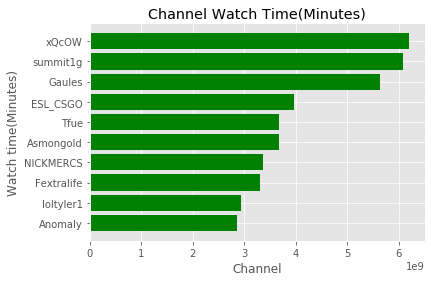

In [10]:
# Creating a plot
x = df['Channel'][:10].tolist()
values = df['Watch time(Minutes)'][:10]
x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, values, color='green')
plt.xlabel("Channel")
plt.ylabel("Watch time(Minutes)")
plt.title("Channel Watch Time(Minutes)")

plt.yticks(x_pos, x)
plt.gca().invert_yaxis()

plt.show()

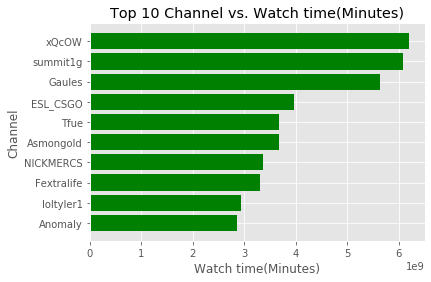

In [67]:
# Function to ouput plot
def createPlot(df, value_colname, no_values=50, horizontal=False, color='green', title='', xrot=0, yrot=0):
    df = df.sort_values(value_colname, ascending=False)
    x = df['Channel'][:no_values].tolist()
    values = df[value_colname][:no_values]
    x_pos = [i for i, _ in enumerate(x)]

    if horizontal:
        plt.barh(x_pos, values, color=color)
    else:
        plt.bar(x_pos, values, color=color)
        
    plt.xlabel(value_colname)
    plt.ylabel("Channel")
    
    if title != '':
        plt.title(title)
    else:
        plt.title(f"Top {no_values} Channel vs. {value_colname}")

    if horizontal:
        plt.yticks(x_pos, x)
        plt.gca().invert_yaxis()
    else:
        plt.xticks(x_pos, x)
    plt.xticks(rotation=xrot)
    plt.yticks(rotation=yrot)

    plt.show()
createPlot(df, 'Watch time(Minutes)', 10, True)

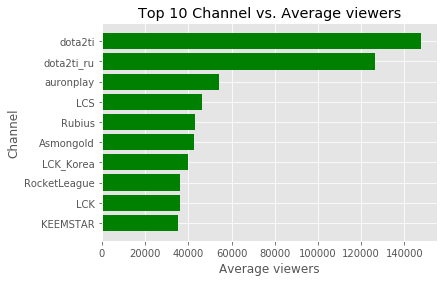

In [68]:
createPlot(df, 'Average viewers', 10, True)

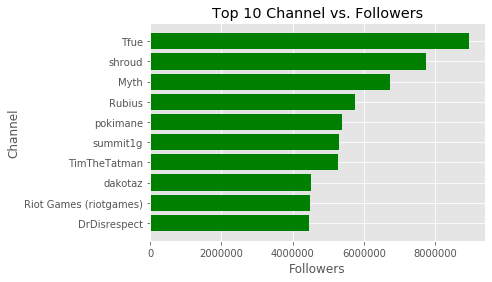

In [69]:
createPlot(df, 'Followers', 10, True)

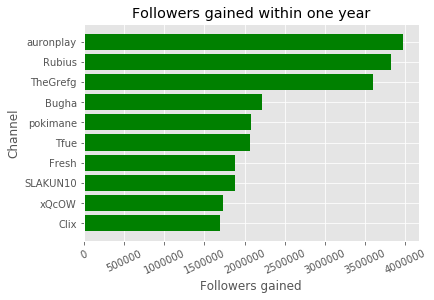

In [70]:
# Top 10 most followers gained within last year
createPlot(df, 'Followers gained', 10, True, title='Followers gained within one year', xrot=25)

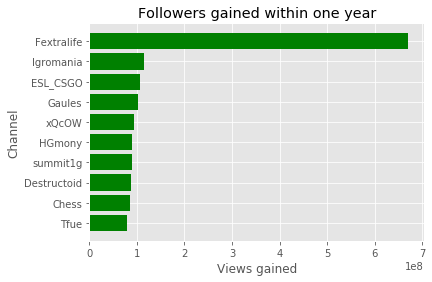

In [71]:
# Top 10 most views gained within last year
createPlot(df, 'Views gained', 10, True, title='Followers gained within one year')

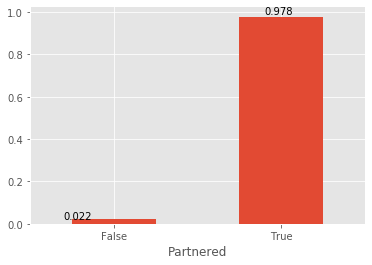

In [72]:
# Percentage of twitch partnerships
partnered = df.groupby('Partnered')['Partnered'].count()
partnered_pct =  partnered / df.count()[0]
ax_p = partnered_pct.plot(kind='bar', rot=0)
for p in ax_p.patches:
    ax_p.annotate(str(p.get_height()), (p.get_x() * 1.2, p.get_height() * 1.01))

In [73]:
df[df['Partnered'] == True][['Channel', 'Watch time(Minutes)', 'Stream time(minutes)', 'Followers']].head(10)

,Channel,Watch time(Minutes),Stream time(minutes),Followers
0,xQcOW,6196161750,215250,3246298
1,summit1g,6091677300,211845,5310163
2,Gaules,5644590915,515280,1767635
3,ESL_CSGO,3970318140,517740,3944850
4,Tfue,3671000070,123660,8938903
5,Asmongold,3668799075,82260,1563438
6,NICKMERCS,3360675195,136275,4074287
7,Fextralife,3301867485,147885,508816
8,loltyler1,2928356940,122490,3530767
9,Anomaly,2865429915,92880,2607076


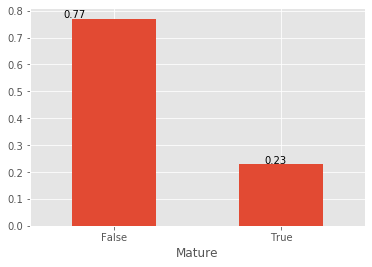

In [74]:
# Percentage of twitch partnerships
matured = df.groupby('Mature')['Mature'].count()
matured_pct =  matured / df.count()[0]
ax_p = matured_pct.plot(kind='bar', rot=0)
for p in ax_p.patches:
    ax_p.annotate(str(p.get_height()), (p.get_x() * 1.2, p.get_height() * 1.005))

In [75]:
df[df['Mature'] == True][['Channel', 'Watch time(Minutes)', 'Stream time(minutes)', 'Followers']].head(10)

,Channel,Watch time(Minutes),Stream time(minutes),Followers
2,Gaules,5644590915,515280,1767635
10,TimTheTatman,2834436990,108780,5265659
15,MontanaBlack88,2408460990,67740,2911316
16,sodapoppin,2329440420,115305,2786162
24,TheRealKnossi,1811696100,56010,1260160
32,MOONMOON,1527882945,124680,923448
42,ROSHTEIN,1435735725,118995,381918
45,Sardoche,1361024835,164235,746865
55,Gorgc,1252711830,141135,391726
63,Quin69,1186941750,174270,538532


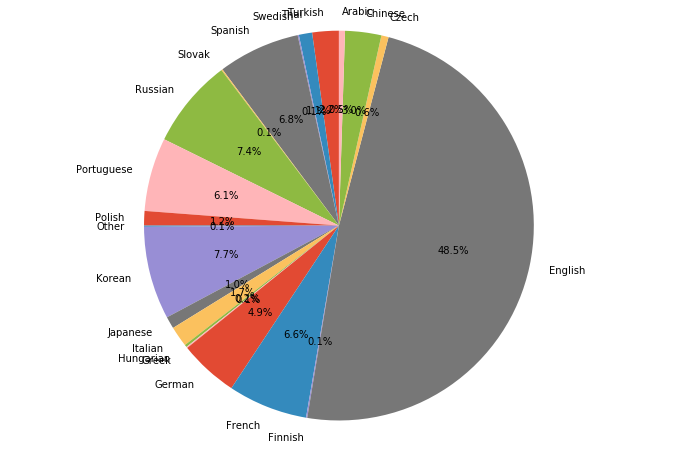

In [76]:
languages = df.groupby('Language').count().reset_index().sort_values('Language', ascending=False)[['Language', 'Channel']]
labels = languages['Language'].tolist()
sizes = languages['Channel'].tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

fig1.set_size_inches(12, 8)
plt.show()

Text(0.5, 1, 'Overall relations for Twitch Dataset')

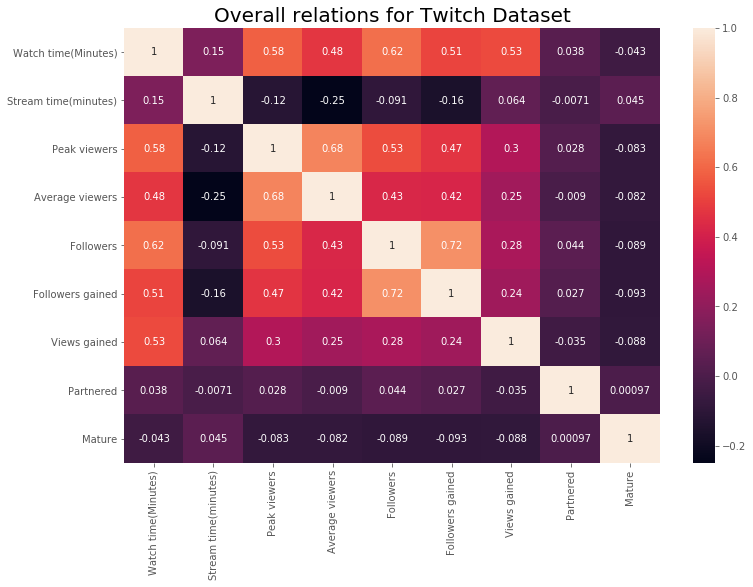

In [77]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Overall relations for Twitch Dataset', fontsize = 20)

Text(0.5, 1.0, 'Average viewers vs. Stream time(Minutes)')

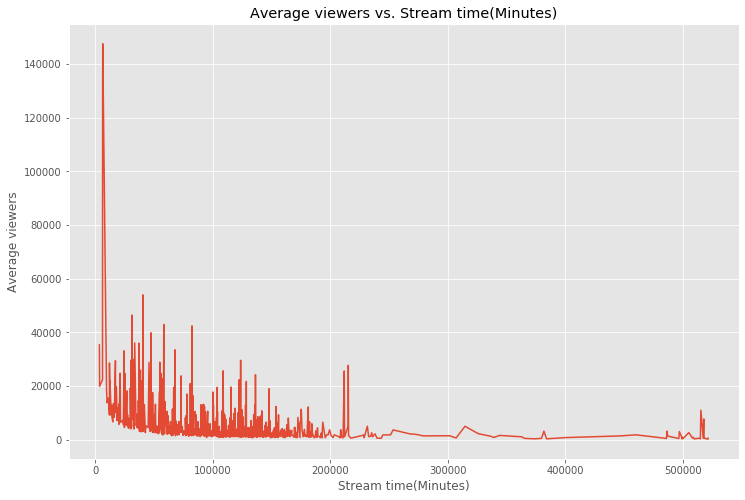

In [78]:
# Average views vs Stream time
views_df = df.sort_values('Stream time(minutes)')

x_values = views_df['Stream time(minutes)']
y_values = views_df['Average viewers']
plt.figure(figsize=(12,8))
plt.plot(x_values, y_values)
plt.ylabel("Average viewers")
plt.xlabel("Stream time(Minutes)")
plt.title("Average viewers vs. Stream time(Minutes)")

Text(0.5, 1.0, 'Average viewers vs. Stream time(Minutes)')

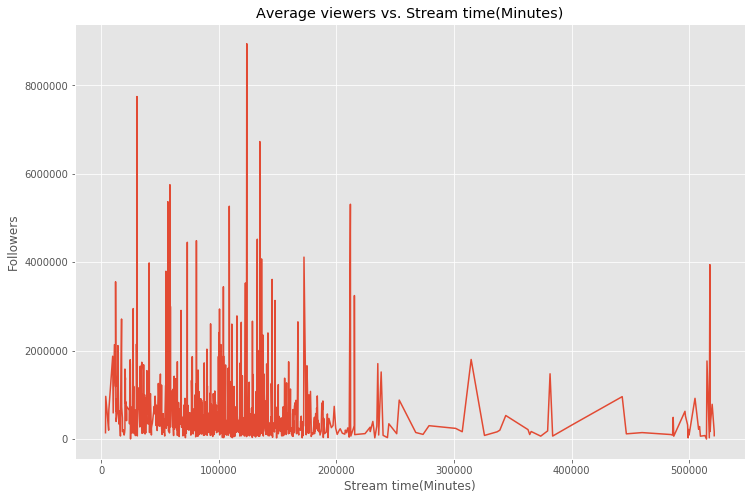

In [79]:
# Followers vs Stream time
x_values = views_df['Stream time(minutes)']
y_values = views_df['Followers']
plt.figure(figsize=(12,8))
plt.plot(x_values, y_values)
plt.ylabel("Followers")
plt.xlabel("Stream time(Minutes)")
plt.title("Average viewers vs. Stream time(Minutes)")

In [80]:
# Methods to create leaderboards
def watchtime(x):
    return df[df['Watch time(Minutes)']==x]
def streamtime(x):
    return df[df['Stream time(minutes)']==x]
def peakviewers(x):
    return df[df['Peak viewers']==x]
def avgviewers(x):
    return df[df['Average viewers']==x]
def followers(x):
    return df[df['Followers']==x]
def followersGained(x):
    return df[df['Followers gained']==x]
def viewsGained(x):
    return df[df['Views gained']==x]

In [81]:
# Get data for the channel with the most watch time
watchtime(df['Watch time(Minutes)'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English


In [82]:
# Takes in string and returns a tuple for which function and column name to use
def determineMethod(method):
    if method == 'watchtime':
        function = watchtime
        col_name = 'Watch time(Minutes)'
    elif method == 'streamtime':
        function = streamtime
        col_name = 'Stream time(minutes)'
    elif method == 'peakviewers':
        function = peakviewers
        col_name = 'Peak viewers'
    elif method == 'avgviewers':
        function = avgviewers
        col_name = 'Average viewers'
    elif method == 'followers':
        function = followers
        col_name = 'Followers'
    elif method == 'followersGained':
        function = followersGained
        col_name = 'Followers gained'
    elif method == 'viewsGained':
        function = viewsGained
        col_name = 'Views gained'
    return (function, col_name)

In [83]:
def leaderBoards(df=df, method='watchtime', length=10, ascending=False):
    function, col_name = determineMethod(method)
        
    sorted_df = df.sort_values(col_name, ascending=ascending)
    temp = sorted_df[col_name][:length].tolist()
    new_df = pd.DataFrame()
    for x in temp:
        new_df = pd.concat([new_df, function(x)])
        
    
    if ascending:
        rankings = [i for i in range(len(df) - length + 1, len(df) + 1)]
        rankings = reversed(rankings)
    else: 
        rankings = [i for i in range(1, length + 1)]
        
    new_df.index = rankings
    new_df.index.name = "Rank"
    return new_df

leaderBoards(df, 'streamtime', 10, True)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
Rank,,,,,,,,,,,
1000,KEEMSTAR,123365895,3465,74195,35333,146035,46367,7139253,False,False,English
999,Call of Duty (callofduty),130938960,3645,170131,19897,968465,50321,5423366,True,True,English
998,DreamHackDota2_RU,152461155,6135,98717,22356,203419,30231,3637232,True,False,Russian
997,dota2ti_ru,812538090,6195,457060,126232,541644,108438,12068376,True,False,Russian
996,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English
995,SLAKUN10,179262330,9555,48358,18906,1874932,1874846,5835029,True,False,Spanish
994,Warcraft,127646610,10005,51972,13741,593564,31688,6635421,True,False,English
993,TSM_Hamlinz,167898480,11055,51989,15483,2137521,126150,2268382,True,False,English
992,Twitch,198083340,12015,130795,9190,1189614,223168,46395022,True,False,English


In [84]:
# Top 3 Watch times
leaderBoards(df, 'watchtime', 3)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
Rank,,,,,,,,,,,
1,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
2,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
3,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese


In [85]:
# Top 3 Stream times
leaderBoards(df, 'streamtime', 3)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
Rank,,,,,,,,,,,
1,RiffTrax,293583075,521445,24765,562,79099,17200,3313465,True,False,English
2,RelaxBeats,123273930,521430,2830,235,166162,29595,1094850,True,False,English
3,Monstercat,163589370,519675,14261,313,788684,22331,4084222,True,False,English


In [86]:
# Top 3 Peak Views
leaderBoards(df, 'peakviewers', 3)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
Rank,,,,,,,,,,,
1,Riot Games (riotgames),2674646715,80820,639375,20960,4487489,497678,56855694,True,False,English
2,TheGrefg,1757406750,54855,538444,28887,3795667,3593081,47094362,True,False,Spanish
3,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English


In [87]:
# Top 3 Average Viewers
leaderBoards(df, 'avgviewers', 3)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
Rank,,,,,,,,,,,
1,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English
2,dota2ti_ru,812538090,6195,457060,126232,541644,108438,12068376,True,False,Russian
3,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish


In [88]:
# Top 3 Followers
leaderBoards(df, 'followers', 3)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
Rank,,,,,,,,,,,
1,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
2,shroud,888505170,30240,471281,29612,7744066,833587,30621257,True,False,English
3,Myth,1479214575,134760,122552,9396,6726893,1421811,37384058,True,False,English


In [89]:
# Top 3 Followers gained
leaderBoards(df, 'followersGained', 3)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
Rank,,,,,,,,,,,
1,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish
2,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish
3,TheGrefg,1757406750,54855,538444,28887,3795667,3593081,47094362,True,False,Spanish


In [90]:
# Top 3 Views gained
leaderBoards(df, 'viewsGained', 3)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
Rank,,,,,,,,,,,
1,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English
2,Igromania,172086390,186960,6159,939,184078,13710,115312954,True,False,Russian
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English


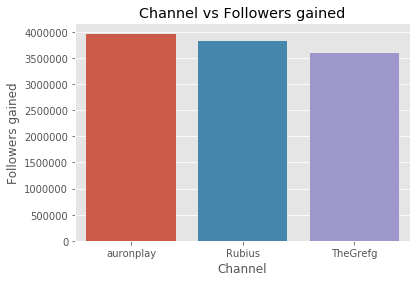

In [91]:
def plotLeaderBoards(df=df, method='watchtime', length=10, ascending=False):
    _, col_name = determineMethod(method)
    ax = sns.barplot(x='Channel', y=col_name, data=leaderBoards(df, method, length, ascending))
    ax.set_title("Channel vs " + col_name)
    return ax
plotLeaderBoards(df, 'followersGained', 3, False)
plt.show()

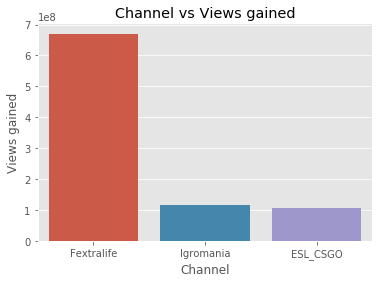

In [92]:
plotLeaderBoards(df, 'viewsGained', 3, False)
plt.show()